# Fetches insert location for fly enhancer trap data


In [48]:
import pandas as pd

enhancer_data = '/Users/annechen/Downloads/Enhancer Trap Data/getdb.csv'

enhancer_df = pd.read_csv(enhancer_data)

enhancer_df.head()

,Unnamed: 0,DGRC Number,Genotype,Insertion Site,Map Viewer,Related Genes,Original Number,Chr.,Comments,Balancer,...,Also known as,Original Comments,Disc (Image),Disc (number),Embryo (Image),Embryo (number),Larval GFP (Image),Larval GFP (number),Adult (Image),Adult (number)
0,1,103491,y[*] w[*] P{GawB}NP0004 / FM7c,"<a href=""http://fruitfly.jp/fly/flystock/physi...",103491.0,CG7058 CG7095,4,1,"FlyBase Insertion: <a href=""http://flybase.org...",FM7c,...,NaN,NaN,"<a href=""http://dbarchive.lifesciencedb.jp/arc...",1,NaN,0,NaN,0,NaN,0
1,2,103492,"y[*] w[*]; P{GawB}NP0007 / TM6, P{UAS-lacZ.UW2...","<a href=""http://fruitfly.jp/fly/flystock/physi...",103492.0,CG14059 G2{}1019,7,3,"FlyBase Insertion: <a href=""http://flybase.org...",TM6UW23-1,...,NaN,NaN,"<a href=""http://dbarchive.lifesciencedb.jp/arc...",1,NaN,0,NaN,0,NaN,0
2,3,103493,"y[*] w[*]; P{GawB}NP0009 / CyO, P{UAS-lacZ.UW1...","<a href=""http://fruitfly.jp/fly/flystock/physi...",103493.0,Dox-A3 l(2)k09913,9,2,"FlyBase Insertion: <a href=""http://flybase.org...",CyUW14,...,NaN,NaN,"<a href=""http://dbarchive.lifesciencedb.jp/arc...",1,NaN,0,NaN,0,NaN,0
3,4,103494,"y[*] w[*]; P{GawB}NP0012 / TM6, P{UAS-lacZ.UW2...","<a href=""http://fruitfly.jp/fly/flystock/physi...",103494.0,th Mbs,12,3,"FlyBase Insertion: <a href=""http://flybase.org...",TM6UW23-1,...,NaN,NaN,"<a href=""http://dbarchive.lifesciencedb.jp/arc...",1,NaN,0,NaN,0,NaN,0
4,5,103495,"y[*] w[*]; P{GawB}NP0014 / CyO, P{UAS-lacZ.UW1...","<a href=""http://fruitfly.jp/fly/flystock/physi...",103495.0,Ugt37b1 CG9486,14,2,"FlyBase Insertion: <a href=""http://flybase.org...",CyUW14,...,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,0


In [97]:
## Function that accesses a given url and parses the html output to grab the sequence location

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

def insert_loc_finder(url):
    html = urlopen(url).read()
    soup = BeautifulSoup(html, features="html.parser")

    # kill all script and style elements
    for script in soup(["script", "style"]):
        script.extract()    # rip it out

    # get text
    text = soup.get_text()

    # break into lines and remove leading and trailing space on each
    lines = (line.strip() for line in text.splitlines())
    # break multi-headlines into a line each
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    # drop blank lines
    text = '\n'.join(chunk for chunk in chunks if chunk)

    m = re.search('Sequence Location\n(.*)\n',text)
    if m:
        return(m.group(1))


In [ ]:
## Parses the dataframe and retrieves the links for each value
import time

insert_loc = []
for index, row in enhancer_df.iterrows():
    ##print (index)
    ##print (enhancer_df.loc[index,'Comments'])
    link_info = enhancer_df.loc[index,'Comments']
    ##print (link_info)
    
    ##If cell is empty, just keeps value as empty cell
    if pd.isna(link_info):
        insert_loc.append(None)
        ##print ('added Na')
        
    ##If cell has value, goes to location of link
    else:
        ##print(link_info)
        m = re.search('<a href="(.*)">P',link_info)
        
        ##If cell has value, retrieves location of insert
        if m:
            link = m.group(1)
            print (index)
            loc = insert_loc_finder(link)
            time.sleep(1)
            insert_loc.append(loc)
        ##If cell has value but not valid link, returns empty cell
        else:
            insert_loc.append(None)
        
        ##print ('added a link')

        
print(insert_loc)
    
    ##if index == 57 and enhancer_df.loc[index,'Comments']:
        ##print (enhancer_df.loc[index,'Comments'])
        ##print ('hi')
        
    ##if index == 1:
        ##link = enhancer_df.loc[[index, 'Comments']]

In [109]:
## Adds the newly created list to the dataframe

enhancer_df.insert(9,'Insert Location', insert_loc, True)
##del enhancer_df['Insert Location']
enhancer_df.head()

,Unnamed: 0,DGRC Number,Genotype,Insertion Site,Map Viewer,Related Genes,Original Number,Chr.,Comments,Insert Location,...,Also known as,Original Comments,Disc (Image),Disc (number),Embryo (Image),Embryo (number),Larval GFP (Image),Larval GFP (number),Adult (Image),Adult (number)
0,1,103491,y[*] w[*] P{GawB}NP0004 / FM7c,"<a href=""http://fruitfly.jp/fly/flystock/physi...",103491.0,CG7058 CG7095,4,1,"FlyBase Insertion: <a href=""http://flybase.org...","X:18,814,125..18,814,125 [+]",...,NaN,NaN,"<a href=""http://dbarchive.lifesciencedb.jp/arc...",1,NaN,0,NaN,0,NaN,0
1,2,103492,"y[*] w[*]; P{GawB}NP0007 / TM6, P{UAS-lacZ.UW2...","<a href=""http://fruitfly.jp/fly/flystock/physi...",103492.0,CG14059 G2{}1019,7,3,"FlyBase Insertion: <a href=""http://flybase.org...","3L:17,032,285..17,032,285 [+]",...,NaN,NaN,"<a href=""http://dbarchive.lifesciencedb.jp/arc...",1,NaN,0,NaN,0,NaN,0
2,3,103493,"y[*] w[*]; P{GawB}NP0009 / CyO, P{UAS-lacZ.UW1...","<a href=""http://fruitfly.jp/fly/flystock/physi...",103493.0,Dox-A3 l(2)k09913,9,2,"FlyBase Insertion: <a href=""http://flybase.org...","2R:23,067,512..23,067,512 [-]",...,NaN,NaN,"<a href=""http://dbarchive.lifesciencedb.jp/arc...",1,NaN,0,NaN,0,NaN,0
3,4,103494,"y[*] w[*]; P{GawB}NP0012 / TM6, P{UAS-lacZ.UW2...","<a href=""http://fruitfly.jp/fly/flystock/physi...",103494.0,th Mbs,12,3,"FlyBase Insertion: <a href=""http://flybase.org...","3L:16,052,453..16,052,453 [+]",...,NaN,NaN,"<a href=""http://dbarchive.lifesciencedb.jp/arc...",1,NaN,0,NaN,0,NaN,0
4,5,103495,"y[*] w[*]; P{GawB}NP0014 / CyO, P{UAS-lacZ.UW1...","<a href=""http://fruitfly.jp/fly/flystock/physi...",103495.0,Ugt37b1 CG9486,14,2,"FlyBase Insertion: <a href=""http://flybase.org...","2L:6,252,473..6,252,473 [-]",...,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,0


In [110]:
enhancer_df.to_csv (r'/Users/annechen/Downloads/Enhancer Trap Data/getdb_w_seq_loc.csv', index = False, header=True)


# Finding intergenic sequences in data

In [16]:
## Import gene data into a dataframe
import pandas as pd

genes = pd.read_csv('/Users/annechen/Downloads/Dmel_genes.tabular', sep='\t')
genes.head()

,#bin,name,chrom,strand,txStart,txEnd,cdsStart,cdsEnd,exonCount,exonStarts,exonEnds,score,name2,cdsStartStat,cdsEndStat,exonFrames
0,9,FBtr0100146,chr4,-,1035287,1053703,1037277,1050519,16,"1035287,1037475,1037645,1038358,1040012,104346...","1037422,1037590,1037740,1038434,1040078,104352...",0,FBgn0264607,cmpl,cmpl,"2,1,2,1,1,1,1,0,0,1,2,1,1,2,0,-1,"
1,9,FBtr0333675,chr4,-,1035287,1053703,1037277,1050519,15,"1035287,1037475,1037645,1038358,1040012,104515...","1037422,1037569,1037740,1038434,1040078,104524...",0,FBgn0264607,cmpl,cmpl,"2,1,2,1,1,1,0,0,1,2,1,1,2,0,-1,"
2,9,FBtr0089218,chr4,-,1035287,1051378,1037277,1050519,14,"1035287,1037475,1037645,1038358,1045155,104726...","1037422,1037590,1037740,1038437,1045248,104739...",0,FBgn0264607,cmpl,cmpl,"2,1,2,1,1,0,0,1,2,1,1,2,0,-1,"
3,9,FBtr0089217,chr4,-,1035287,1053703,1037277,1050519,14,"1035287,1037475,1037645,1038358,1045155,104726...","1037422,1037590,1037740,1038437,1045248,104739...",0,FBgn0264607,cmpl,cmpl,"2,1,2,1,1,0,0,1,2,1,1,2,0,-1,"
4,9,FBtr0300378,chr4,-,1035287,1051378,1037277,1050519,17,"1035287,1037475,1037645,1038358,1040012,104346...","1037422,1037590,1037740,1038434,1040078,104352...",0,FBgn0264607,cmpl,cmpl,"2,1,2,1,1,1,1,0,0,1,2,1,1,2,0,-1,-1,"


In [17]:
## Creates dict of all the chromosomes

list = [0]
chrom = {}

chrom['chr3R'] = list*32079331
chrom['chr3L'] = list*28110227
chrom['chr2R'] = list*25286936 
chrom['chr2L'] = list*23513712 
chrom['chr4'] = list*1348131
chrom['chrX'] = list*23542271
chrom['chrY'] = list*3667352


In [ ]:
## Creates the file of genes in the chromosomes

for index, row in genes.iterrows():
    chrom_id = genes.loc[index, 'chrom']
    ## Find correct chromosome list from dictionary
    if chrom.get(chrom_id):
        gene_list = chrom[chrom_id]
        start = genes.loc[index,'txStart']
        end = genes.loc[index,'txEnd']

        while start <= end:
            gene_list[start-1] = 1
            start += 1

##    if index % 500 == 0:
##        print (str(index)+ ' counted')


In [118]:
import pandas as pd

enhancer_w_inserts = '/Users/annechen/Downloads/Enhancer Trap Data/getdb_w_seq_loc.csv'

mod_enhancer = pd.read_csv(enhancer_w_inserts)

mod_enhancer.head()

,Unnamed: 0,DGRC Number,Genotype,Insertion Site,Map Viewer,Related Genes,Original Number,Chr.,Comments,Insert Location,...,Also known as,Original Comments,Disc (Image),Disc (number),Embryo (Image),Embryo (number),Larval GFP (Image),Larval GFP (number),Adult (Image),Adult (number)
0,1,103491,y[*] w[*] P{GawB}NP0004 / FM7c,"<a href=""http://fruitfly.jp/fly/flystock/physi...",103491.0,CG7058 CG7095,4,1,"FlyBase Insertion: <a href=""http://flybase.org...","X:18,814,125..18,814,125 [+]",...,NaN,NaN,"<a href=""http://dbarchive.lifesciencedb.jp/arc...",1,NaN,0,NaN,0,NaN,0
1,2,103492,"y[*] w[*]; P{GawB}NP0007 / TM6, P{UAS-lacZ.UW2...","<a href=""http://fruitfly.jp/fly/flystock/physi...",103492.0,CG14059 G2{}1019,7,3,"FlyBase Insertion: <a href=""http://flybase.org...","3L:17,032,285..17,032,285 [+]",...,NaN,NaN,"<a href=""http://dbarchive.lifesciencedb.jp/arc...",1,NaN,0,NaN,0,NaN,0
2,3,103493,"y[*] w[*]; P{GawB}NP0009 / CyO, P{UAS-lacZ.UW1...","<a href=""http://fruitfly.jp/fly/flystock/physi...",103493.0,Dox-A3 l(2)k09913,9,2,"FlyBase Insertion: <a href=""http://flybase.org...","2R:23,067,512..23,067,512 [-]",...,NaN,NaN,"<a href=""http://dbarchive.lifesciencedb.jp/arc...",1,NaN,0,NaN,0,NaN,0
3,4,103494,"y[*] w[*]; P{GawB}NP0012 / TM6, P{UAS-lacZ.UW2...","<a href=""http://fruitfly.jp/fly/flystock/physi...",103494.0,th Mbs,12,3,"FlyBase Insertion: <a href=""http://flybase.org...","3L:16,052,453..16,052,453 [+]",...,NaN,NaN,"<a href=""http://dbarchive.lifesciencedb.jp/arc...",1,NaN,0,NaN,0,NaN,0
4,5,103495,"y[*] w[*]; P{GawB}NP0014 / CyO, P{UAS-lacZ.UW1...","<a href=""http://fruitfly.jp/fly/flystock/physi...",103495.0,Ugt37b1 CG9486,14,2,"FlyBase Insertion: <a href=""http://flybase.org...","2L:6,252,473..6,252,473 [-]",...,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,0


In [120]:
## Parses dataframe for insert location and creates new dataframe of intergenic sequences
import re

## Creates new df to input intergenic sequences
headers = mod_enhancer.columns.values.tolist()
intergenic_df = pd.DataFrame(columns = headers)

##for index, row in mod_enhancer.iterrows():
    ##test_df = test_df.append(row)

##test_df.head()

for index, row in mod_enhancer.iterrows():
    ##print (index)
    insert_loc = mod_enhancer.loc[index,'Insert Location']
    ##print (insert_loc)
    
    ## Checks if cell has a value:
    if pd.isnull(insert_loc) == False:
        chromosome = re.search('(.*):.*', insert_loc)
        start = re.search('.*:(.*)\.\..*', insert_loc)
        end = re.search('.*:.*\.\.(.*\d)', insert_loc)

        ## If cell has valid values, searches whether it is intergenic
        if chromosome and start and end:
            chrom_id = 'chr'+chromosome.group(1)
            start = start.group(1)
            start = int(start.replace(',',''))
            end = end.group(1)
            end = int(end.replace(',',''))

            ## If sequence is single bp:
            if start == end and chrom.get(chrom_id):
                if chrom[chrom_id][start-1] == 0:
                    ##print (str(start)+': It\'s intergenic!')
                    intergenic_df = intergenic_df.append(row)

            ## If seqence is a range:
            if start < end and chrom.get(chrom_id):
                is_intergenic = 'yes'
                while start <= end:
                    if chrom[chrom_id][start-1] == 1:
                        is_intergenic = 'no'
                    start += 1
                if is_intergenic == 'yes':
                    ##print (str(start) + ' to ' + str(end)+': It\'s intergenic!')
                    intergenic_df = intergenic_df.append(row)

    if index % 500 == 0:
        print (str(index)+ ' counted')

0 counted
500 counted
1000 counted
1500 counted
2000 counted
2500 counted
3000 counted
3500 counted
4000 counted


In [121]:
intergenic_df.to_csv (r'/Users/annechen/Downloads/Enhancer Trap Data/intergenic_enhancer_traps.csv', index = False, header=True)


In [122]:
print (len(intergenic_df.index))

849


# Checking distance of intergenic sequences

In [31]:
## Sets up dictionary with key as promoter and a list of gene names 

##import pandas as pd
##genes = pd.read_csv('/Users/annechen/Downloads/Dmel_genes.tabular', sep='\t')
##genes.head()

genes_dic = {}
##genes_dic = {'chr2R':{}, 'chr2L':{}, 'chr3R':{}, 'chr3L':{}, 'chrX':{}, 'chrY':{},'chr4':{}}
for index, row in genes.iterrows():
    chrom = genes.loc[index,'chrom']
    strand = genes.loc[index,'strand']
    name = genes.loc[index,'name']
    ## Finds correct strand to make promoter
    if strand == '+':
        promoter = genes.loc[index, 'txStart']
    else:
        promoter = genes.loc[index, 'txEnd']
    ##print (str(index) + ' ' + str(promoter))
    
    ## If chromosome doesn't exist yet
    if not genes_dic.get(chrom):
        genes_dic[chrom] = {}
        genes_dic[chrom][promoter] = [name]
    ## If chromosome exists but promoter does not exist
    elif not genes_dic[chrom].get(promoter):
        genes_dic[chrom][promoter] = [name]
    ## If chromosome and promoter exists, adds gene name to list
    elif genes_dic[chrom].get(promoter):
        name_list = genes_dic[chrom][promoter]
        name_list.append(name)
        

In [62]:
## Redownloads intergenic sequence df in case running notebook without previous cells
intergenic_df = pd.read_csv('/Users/annechen/Downloads/Enhancer Trap Data/intergenic_enhancer_traps.csv')
intergenic_df.head()


,Unnamed: 0,DGRC Number,Genotype,Insertion Site,Map Viewer,Related Genes,Original Number,Chr.,Comments,Insert Location,...,Also known as,Original Comments,Disc (Image),Disc (number),Embryo (Image),Embryo (number),Larval GFP (Image),Larval GFP (number),Adult (Image),Adult (number)
0,5,103495,"y[*] w[*]; P{GawB}NP0014 / CyO, P{UAS-lacZ.UW1...","<a href=""http://fruitfly.jp/fly/flystock/physi...",103495.0,Ugt37b1 CG9486,14,2,"FlyBase Insertion: <a href=""http://flybase.org...","2L:6,252,473..6,252,473 [-]",...,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,0
1,16,103507,"y[*] w[*]; P{GawB}NP0052 / TM6, P{UAS-lacZ.UW2...","<a href=""http://fruitfly.jp/fly/flystock/physi...",103507.0,Pk61C roo{}896,52,3,"FlyBase Insertion: <a href=""http://flybase.org...","3L:128,619..128,619 [+]",...,P{GawB}Np52,NaN,"<a href=""http://dbarchive.lifesciencedb.jp/arc...",1,NaN,0,NaN,0,NaN,0
2,27,103520,"y[*] w[*]; P{GawB}NP0097 / TM6, P{UAS-lacZ.UW2...","<a href=""http://fruitfly.jp/fly/flystock/physi...",103520.0,CG15374 CR33185 3S18{}1090,97,3,"FlyBase Insertion: <a href=""http://flybase.org...","3L:22,136,058..22,136,058 [-]",...,NaN,NaN,"<a href=""http://dbarchive.lifesciencedb.jp/arc...",4,"<a href=""http://dbarchive.lifesciencedb.jp/arc...",3,NaN,0,NaN,0
3,32,103525,"y[*] w[*]; P{GawB}NP0111 / CyO, P{UAS-lacZ.UW1...","<a href=""http://fruitfly.jp/fly/flystock/physi...",103525.0,SoxN CG9468,111,2,"FlyBase Insertion: <a href=""http://flybase.org...","2L:8,825,393..8,825,393 [-]",...,NaN,NaN,NaN,0,"<a href=""http://dbarchive.lifesciencedb.jp/arc...",3,NaN,0,NaN,0
4,35,103528,"y[*] w[*]; P{GawB}NP0114 / CyO, P{UAS-lacZ.UW1...","<a href=""http://fruitfly.jp/fly/flystock/physi...",103528.0,Rh5 CG6746,114,2,"FlyBase Insertion: <a href=""http://flybase.org...","2L:12,003,139..12,003,661",...,NaN,NaN,NaN,0,NaN,0,NaN,0,NaN,0


In [95]:
## Goes through intergenic sequences and creates a new dataframe of intergenic sequence distance from nearest promoters

import re

distance_to_gene_df = pd.DataFrame(columns =['ID', 'Chromosome','Start', 'End', 'Distance to Left', 
                                             'Distance to Right','Closest Promoter','Left:Right Distance Ratio', 'Left Genes', 'Right Genes'])

for index, row in intergenic_df.iterrows():
    ID = intergenic_df.loc[index,'Unnamed: 0']
    insert_loc = intergenic_df.loc[index,'Insert Location']

    if pd.isnull(insert_loc) == False:
        chromosome = re.search('(.*):.*', insert_loc)
        start = re.search('.*:(.*)\.\..*', insert_loc)
        end = re.search('.*:.*\.\.(.*\d)', insert_loc)

        ## If cell has valid values, sets values for start and end
        if chromosome and start and end:
            chrom_id = 'chr'+chromosome.group(1)
            start = start.group(1)
            start = int(start.replace(',',''))
            end = end.group(1)
            end = int(end.replace(',',''))
            
            nearest_left = 0
            nearest_right = 999999999999
            
            ## If insertion is at single location:
            chrom_dic = genes_dic[chrom_id]
            for promoter in chrom_dic:
                if promoter >= nearest_left and promoter <= start:
                    nearest_left = promoter
                if promoter <= nearest_right and promoter >= end: 
                    nearest_right = promoter
            
            ## Puts information into dataframe
            location = chrom_id + ' ' + str(start) + '-' + str(end)
            dist_left = start - nearest_left
            dist_right = nearest_right - end
            dist_ratio = dist_left/dist_right

            ## Edge cases for edge genes
            ##if nearest_left = 0:
                ##dist_left = 0
            ##if nearest_right = 999999999999:
                ##dist_right = 0
            
            if chrom_dic.get(nearest_left) and chrom_dic.get(nearest_right):
                left_gene = chrom_dic[nearest_left]
                right_gene = chrom_dic[nearest_right]
            else: 
                if nearest_left == 0:
                    left_gene = 'On the edge'
                if nearest_right == 999999999999:
                    right_gene = 'On the edge'
            
            closest_prom = dist_left
            if dist_right < dist_left:
                closest_prom = dist_right
                
            distance_to_gene_df = distance_to_gene_df.append({'ID':ID,  'Chromosome':chrom_id,'Start':start, 'End':end, 'Distance to Left':dist_left, 
                                             'Distance to Right':dist_right, 'Closest Promoter': closest_prom, 'Left:Right Distance Ratio': dist_ratio,
                                             'Left Genes':left_gene, 'Right Genes':right_gene}, ignore_index=True)

distance_to_gene_df.head(10)
    

,ID,Chromosome,Start,End,Distance to Left,Distance to Right,Closest Promoter,Left:Right Distance Ratio,Left Genes,Right Genes
0,5,chr2L,6252473,6252473,20667,649,649,31.844376,[FBtr0343397],"[FBtr0340169, FBtr0344770, FBtr0344771]"
1,16,chr3L,128619,128619,953,830,830,1.148193,[FBtr0345841],"[FBtr0072464, FBtr0333218]"
2,27,chr3L,22136058,22136058,14127,31,31,455.709677,[FBtr0445724],"[FBtr0301492, FBtr0333219]"
3,32,chr2L,8825393,8825393,42893,251,251,170.888446,[FBtr0302991],"[FBtr0079733, FBtr0330210]"
4,35,chr2L,12003139,12003661,873,4491,873,0.194389,[FBtr0080313],[FBtr0342591]
5,38,chr3L,17421519,17421519,5,3698,5,0.001352,[FBtr0075232],[FBtr0075231]
6,41,chr3R,11569128,11569227,2074,22,22,94.272727,"[FBtr0100323, FBtr0100464, FBtr0100320, FBtr01...",[FBtr0302027]
7,46,chr2R,21101761,21101761,4004,166,166,24.120482,[FBtr0112645],"[FBtr0342842, FBtr0089600]"
8,48,chrX,5964268,5964268,21,2010,21,0.010448,[FBtr0070892],"[FBtr0343413, FBtr0070865]"
9,49,chrX,12007072,12007072,3158,103,103,30.660194,[FBtr0073580],"[FBtr0073574, FBtr0339626]"


In [ ]:
## Sorts data by distance to promoter

sorted_distance = distance_to_gene_df.sort_values(by=['Closest Promoter'],ascending=True)
sorted_distance.head()

sorted_distance.to_csv (r'/Users/annechen/Downloads/Enhancer Trap Data/distance_to_promoter.csv', index = False, header=True)


## FILTERING READS: Run the code below this to filter the distance_to_promoter file and output good_enhancer_data

In [ ]:
## Use this cell to import distance_to_promoter file to run in the cell below
import pandas as pd

sorted_distance = pd.read_csv('/Users/annechen/Downloads/Enhancer Trap Data/distance_to_promoter.csv')


In [109]:
## Filters all data for anything greater than 100 bp distance and a left:right ratio less than 1:5 or 5:1

## Creates new df to input filtered values
headers = sorted_distance.columns.values.tolist()
filtered_enhancers = pd.DataFrame(columns = headers)


for index, row in sorted_distance.iterrows():
    closest_promoter = sorted_distance.loc[index,'Closest Promoter']
    ratio = sorted_distance.loc[index,'Left:Right Distance Ratio']
    
    ## Edit this line to change the distance and ratios:
    if closest_promoter > 100 and ratio < 5 and ratio > 0.2:
        filtered_enhancers = filtered_enhancers.append(row)

filtered_enhancers.to_csv (r'/Users/annechen/Downloads/Enhancer Trap Data/good_enhancer_data.csv', index = False, header=True)
print ('Number of enhancer traps that satisfy parameters: ' + str(len(filtered_enhancers)))

filtered_enhancers.head()


Number of enhancer traps that satisfy parameters: 153


,ID,Chromosome,Start,End,Distance to Left,Distance to Right,Closest Promoter,Left:Right Distance Ratio,Left Genes,Right Genes
644,3110,chr2R,6501880,6501880,108,125,108,0.864000,[FBtr0347304],[FBtr0114365]
839,4199,chr2R,6501881,6501881,109,124,109,0.879032,[FBtr0347304],[FBtr0114365]
840,4201,chr2R,6501881,6501881,109,124,109,0.879032,[FBtr0347304],[FBtr0114365]
769,3812,chr2R,9836868,9836868,226,116,116,1.948276,[FBtr0088487],[FBtr0088477]
713,3489,chrX,6997935,6998371,136,300,136,0.453333,"[FBtr0332282, FBtr0332283]","[FBtr0071006, FBtr0332314, FBtr0071005, FBtr03..."


### Also processes distances for non-intergenic sequences (entire data set)


In [102]:
## Goes through all sequences (not only intergenic) and creates a new dataframe of sequence distance from nearest promoters

all_data = pd.read_csv('/Users/annechen/Downloads/Enhancer Trap Data/getdb_w_seq_loc.csv')

import re

all_data_dist = pd.DataFrame(columns =['ID', 'Chromosome','Start', 'End', 'Distance to Left', 
                                             'Distance to Right','Closest Promoter', 'Left Genes', 'Right Genes'])

for index, row in all_data.iterrows():
    ID = all_data.loc[index,'Unnamed: 0']
    insert_loc = all_data.loc[index,'Insert Location']

    if pd.isnull(insert_loc) == False:
        chromosome = re.search('(.*):.*', insert_loc)
        start = re.search('.*:(.*)\.\..*', insert_loc)
        end = re.search('.*:.*\.\.(.*\d)', insert_loc)

        ## If cell has valid values, sets values for start and end
        if chromosome and start and end:
            chrom_id = 'chr'+chromosome.group(1)
            start = start.group(1)
            start = int(start.replace(',',''))
            end = end.group(1)
            end = int(end.replace(',',''))
            
            nearest_left = 0
            nearest_right = 999999999999
            
            ## If insertion is at single location:
            chrom_dic = genes_dic[chrom_id]
            for promoter in chrom_dic:
                if promoter >= nearest_left and promoter <= start:
                    nearest_left = promoter
                if promoter <= nearest_right and promoter >= end: 
                    nearest_right = promoter
            
            ## Puts information into dataframe
            location = chrom_id + ' ' + str(start) + '-' + str(end)
            dist_left = start - nearest_left
            dist_right = nearest_right - end
            
            ## Edge cases for edge genes
            ##if nearest_left = 0:
                ##dist_left = 0
            ##if nearest_right = 999999999999:
                ##dist_right = 0
            
            if chrom_dic.get(nearest_left) and chrom_dic.get(nearest_right):
                left_gene = chrom_dic[nearest_left]
                right_gene = chrom_dic[nearest_right]
            else: 
                if nearest_left == 0:
                    left_gene = 'On the edge'
                if nearest_right == 999999999999:
                    right_gene = 'On the edge'
            
            closest_prom = dist_left
            if dist_right < dist_left:
                closest_prom = dist_right
                
            all_data_dist = all_data_dist.append({'ID':ID,  'Chromosome':chrom_id,'Start':start, 'End':end, 'Distance to Left':dist_left, 
                                             'Distance to Right':dist_right, 'Closest Promoter': closest_prom,
                                             'Left Genes':left_gene, 'Right Genes':right_gene}, ignore_index=True)

##all_data_dist.head(10)
    

## Graphs of distance to promoters (first is all data, second is intergenic only)

Text(0.5, 1.0, 'Distance to Promoter')

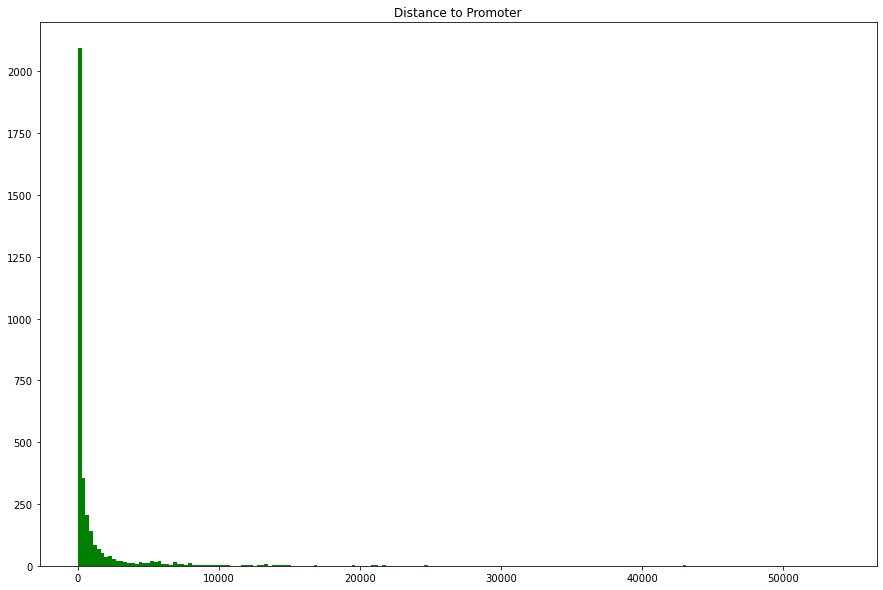

In [103]:
## Plot all data (not just intergenic enhancers) in histogram of distance to promoter
import matplotlib.pyplot as plt

distance = all_data_dist['Closest Promoter'].tolist()
plt.figure(figsize=(15,10))
plt.hist(distance,bins = 200, color = 'green')
plt.show
plt.title('Distance to Promoter')


Text(0.5, 1.0, 'Distance to Promoter')

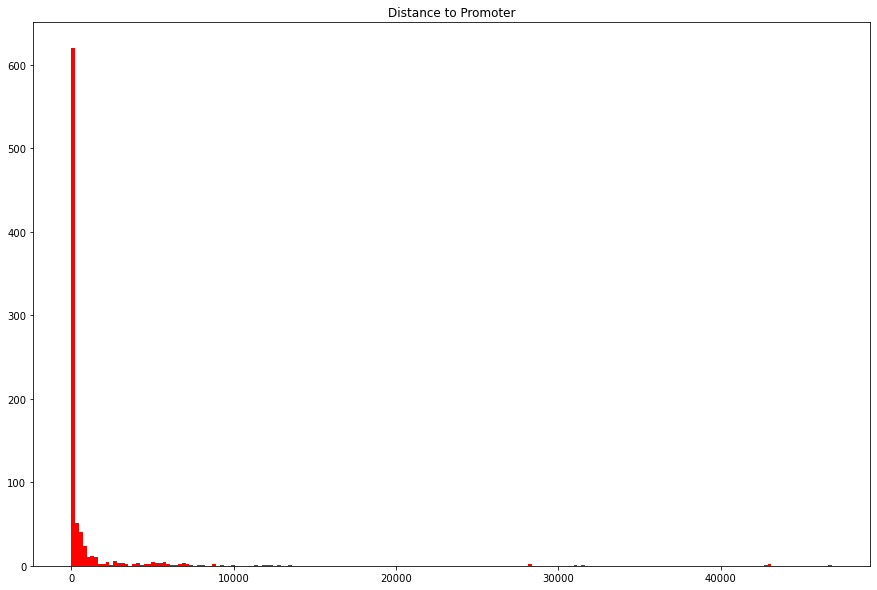

In [89]:
## Plot intergenic data in histogram of distance to promoter
import matplotlib.pyplot as plt

distance = distance_to_gene_df['Closest Promoter'].tolist()
plt.figure(figsize=(15,10))
plt.hist(distance,bins = 200, color = 'red')
plt.show
plt.title('Distance to Promoter')


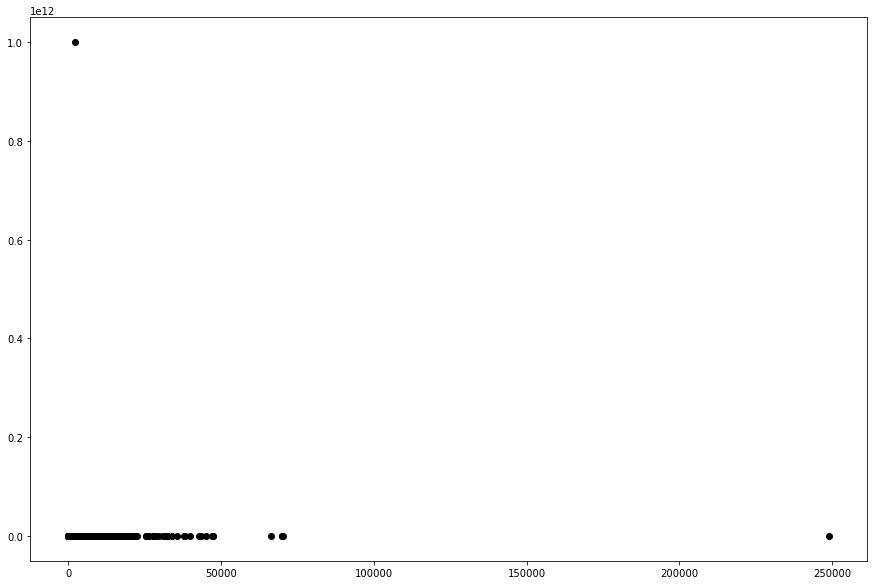

In [87]:
## Just trying something to visualize distance between closest promoters on either distance; still tinkering with settings on this
left_distance = distance_to_gene_df['Distance to Left'].tolist()
right_distance = distance_to_gene_df['Distance to Right'].tolist()

plt.figure(figsize=(15,10))
plt.plot(left_distance, right_distance, 'o', color='black')


### Experimental/Tester Code

In [31]:
## Test cell to make sure previous chromosomes were set up correctly

index = 1053703
start = index-5
end = index+5

while start <= end:
    print (str(start)+': '+str(chrom['chr4'][start]))
    start += 1
    


1053698: 1
1053699: 1
1053700: 1
1053701: 1
1053702: 1
1053703: 0
1053704: 0
1053705: 0
1053706: 0
1053707: 0
1053708: 0


In [22]:
## 
tester_dic = {}
tester_dic['chr1'] = list*10
tester_dic['chr2'] = list*15
print (tester_dic)

start = 3
end = 6
bp = 1

for i in tester_dic['chr1']:
    
    if bp >= start and bp <= end:
        print ('something')
        list_edit = tester_dic['chr1']
        list_edit[bp-1] = 1
        ##tester_dic['chr1'] = list_edit
    bp += 1
    
print (tester_dic)

{'chr1': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'chr2': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
something
something
something
something
{'chr1': [0, 0, 1, 1, 1, 1, 0, 0, 0, 0], 'chr2': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


In [37]:
## 
tester_dic = {}
tester_dic['chr1'] = list*10
tester_dic['chr2'] = list*15
print (tester_dic)

start = 3
end = 6

while start <= end:
    list_edit = tester_dic['chr1']
    list_edit[start-1] = 1
    start += 1
    
    
print (tester_dic)

{'chr1': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'chr2': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
{'chr1': [0, 0, 1, 1, 1, 1, 0, 0, 0, 0], 'chr2': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


In [96]:
insert_loc = ''
if insert_loc != None:
    
    chromosome = re.search('(.*):.*', insert_loc)
    start = re.search('.*:(.*)\.\..*', insert_loc)
    end = re.search('.*:.*\.\.(.*\d)', insert_loc)

In [ ]:
## Tester; input a sequence in insert_loc and see what comes out

insert_loc = '2L:12008151..12008151'
chromosome = re.search('(.*):.*', insert_loc)
start = re.search('.*:(.*)\.\..*', insert_loc)
end = re.search('.*:.*\.\.(.*\d)', insert_loc)

## If cell has valid values, searches whether it is intergenic
if chromosome and start and end:
    chrom_id = 'chr'+chromosome.group(1)
    print (chrom_id)
    start = start.group(1)
    start = int(start.replace(',',''))
    print (start)
    end = end.group(1)
    end = int(end.replace(',',''))
    print (end)
    

    ## If sequence is single bp:
    if start == end and chrom.get(chrom_id):
        print ('triggered')
        if chrom[chrom_id][start-1] == 0:
            print (str(start)+': It\'s intergenic!')
        else:
            print ('Not intergenic.')

    ## If seqence is a range:
    if start < end and chrom.get(chrom_id):
        is_intergenic = 'yes'
        while start <= end:
            if chrom[chrom_id][start-1] == 1:
                is_intergenic = 'no'
            start += 1
        if is_intergenic == 'yes':
            print (str(start) + ' to ' + str(end)+': It\'s intergenic!')
        else: 
            print ('Not intergenic')
        

In [ ]:
headers = mod_enhancer.columns.values.tolist()
test_df = pd.DataFrame(columns = headers)

for index, row in mod_enhancer.iterrows():
    test_df = test_df.append(row)

test_df.head()
